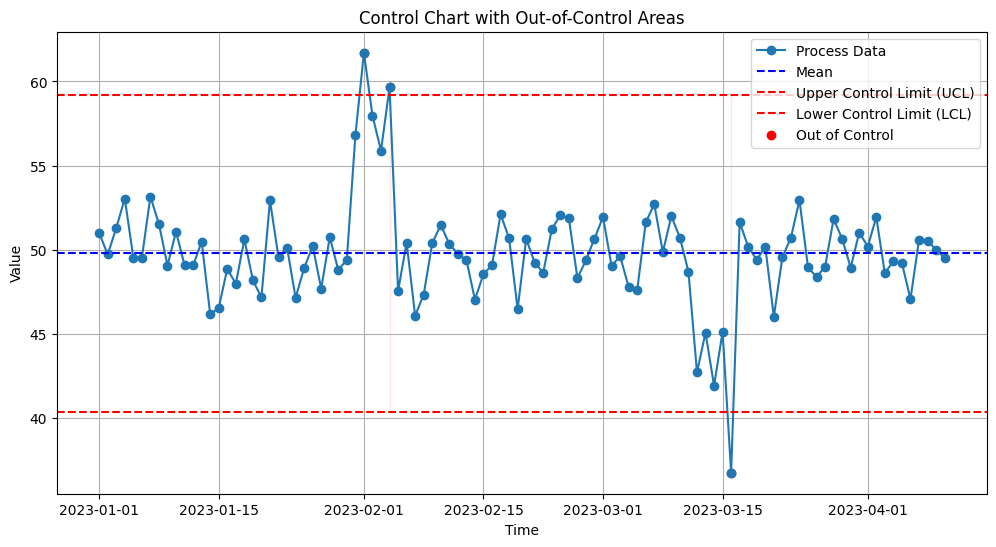

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Generate simulated process data
np.random.seed(42)
time = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.random.normal(50, 2, 100)
# Introduce out-of-control points
values[30:35] += 8
values[70:75] -= 8
# Create a DataFrame
df = pd.DataFrame({"Time": time, "Value": values})

# Calculate control limits
mean = df["Value"].mean()
std_dev = df["Value"].std()
ucl = mean + 3 * std_dev  # Upper Control Limit
lcl = mean - 3 * std_dev  # Lower Control Limit
# Plot the control chart
plt.figure(figsize=(12, 6))
plt.plot(df["Time"], df["Value"], label="Process Data", marker="o", linestyle="-")
plt.axhline(mean, color="blue", linestyle="--", label="Mean")
plt.axhline(ucl, color="red", linestyle="--", label="Upper Control Limit (UCL)")
plt.axhline(lcl, color="red", linestyle="--", label="Lower Control Limit (LCL)")
# Highlight out-of-control points
out_of_control = (df["Value"] > ucl) | (df["Value"] < lcl)
plt.scatter(df["Time"][out_of_control], df["Value"][out_of_control], color="red", label="Out of Control")
# Shade out-of-control regions
plt.fill_between(df["Time"], ucl, lcl, where=(df["Value"] > ucl) | (df["Value"] < lcl), color="red", alpha=0.1)
# Add labels and legend
title = "Control Chart with Out-of-Control Areas"
plt.title(title)
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.savefig(f"{title}.png")
plt.show()

In [6]:
"""
works
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class CausalInferenceVisualizer:
    def __init__(self):
        np.random.seed(42)
        self.t = np.linspace(0, 10, 500)

        # Generate two related time series
        self.x = np.sin(self.t) + np.random.normal(0, 0.1, len(self.t))
        self.y = np.sin(self.t + 0.5) + np.random.normal(0, 0.1, len(self.t))

    def create_animation(self):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Causal Analysis in Time Series', fontsize=16)

        def animate(frame):
            # Clear all axes
            for ax in [ax1, ax2, ax3, ax4]:
                ax.clear()

            # Plot 1: Original Time Series
            window = 100
            start_idx = frame % (len(self.t) - window)
            end_idx = start_idx + window

            ax1.plot(self.t[start_idx:end_idx], self.x[start_idx:end_idx],
                    label='Series X', color='blue')
            ax1.plot(self.t[start_idx:end_idx], self.y[start_idx:end_idx],
                    label='Series Y', color='red')
            ax1.set_title('Time Series Data')
            ax1.legend()
            ax1.set_xlabel('Time')
            ax1.set_ylabel('Value')

            # Plot 2: Granger Causality
            lags = 20
            if start_idx > lags:
                x_lagged = self.x[start_idx-lags:end_idx-lags]
                y_current = self.y[start_idx:end_idx]
                ax2.scatter(x_lagged, y_current, alpha=0.5, color='purple')
                ax2.set_title('Granger Causality Analysis')
                ax2.set_xlabel('X (lagged)')
                ax2.set_ylabel('Y (current)')

            # Plot 3: Treatment Effect (Moving treatment point)
            treatment_point = start_idx + window//2
            ax3.plot(self.t[start_idx:treatment_point],
                    self.y[start_idx:treatment_point],
                    color='blue', label='Pre-treatment')
            ax3.plot(self.t[treatment_point:end_idx],
                    self.y[treatment_point:end_idx],
                    color='red', label='Post-treatment')
            ax3.axvline(x=self.t[treatment_point], color='black',
                       linestyle='--', label='Treatment')
            ax3.set_title('Treatment Effect Analysis')
            ax3.legend()
            ax3.set_xlabel('Time')
            ax3.set_ylabel('Outcome')

            # Plot 4: Dynamic Impulse Response
            t_impulse = np.arange(50)
            phase = 2 * np.pi * frame / len(self.t)  # Changes with frame
            response = np.exp(-t_impulse * 0.1) * np.sin(t_impulse * 0.5 + phase)
            ax4.plot(t_impulse, response, color='green')
            ax4.set_title('Impulse Response Function')
            ax4.set_xlabel('Time')
            ax4.set_ylabel('Response')
            ax4.set_ylim(-1, 1)  # Fix y-axis limits

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        anim = FuncAnimation(fig, animate, frames=len(self.t)-100,
                           interval=200, repeat=True)  # Slowed down animation

        return anim

# Create and save animation
visualizer = CausalInferenceVisualizer()
anim = visualizer.create_animation()
anim.save('causal_inference.gif', writer='pillow', fps=10)  # Slower fps
plt.close()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import TruncatedSVD

class MFLEVisualizer:
    def __init__(self):
        # Generate synthetic multivariate time series data
        np.random.seed(42)
        self.n_series = 5
        self.n_timepoints = 200
        self.n_components = 3

        # Create underlying patterns
        t = np.linspace(0, 4*np.pi, self.n_timepoints)
        trend = np.linspace(0, 2, self.n_timepoints)
        seasonal = np.sin(t)
        cyclical = np.cos(t/2)

        # Generate multiple time series with different combinations of patterns
        self.data = np.zeros((self.n_series, self.n_timepoints))
        for i in range(self.n_series):
            weights = np.random.rand(3)
            self.data[i] = (weights[0] * trend +
                           weights[1] * seasonal +
                           weights[2] * cyclical +
                           np.random.normal(0, 0.1, self.n_timepoints))

        # Perform SVD
        self.svd = TruncatedSVD(n_components=self.n_components)
        self.latent_features = self.svd.fit_transform(self.data)
        self.components = self.svd.components_
        self.reconstructed = self.latent_features @ self.components

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(3, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Original time series
        ax2 = fig.add_subplot(gs[1, 0])  # Latent components
        ax3 = fig.add_subplot(gs[1, 1])  # Reconstruction error
        ax4 = fig.add_subplot(gs[2, :])  # Reconstructed series

        def animate(frame):
            # Clear previous frame
            for ax in [ax1, ax2, ax3, ax4]:
                ax.clear()

            # Window for visualization
            window = 50
            start_idx = frame % (self.n_timepoints - window)
            end_idx = start_idx + window

            # Plot 1: Original Time Series
            for i in range(self.n_series):
                ax1.plot(range(start_idx, end_idx),
                        self.data[i, start_idx:end_idx],
                        label=f'Series {i+1}', alpha=0.7)
            ax1.set_title('Original Time Series')
            ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

            # Plot 2: Latent Components
            for i in range(self.n_components):
                ax2.plot(range(start_idx, end_idx),
                        self.components[i, start_idx:end_idx],
                        label=f'Component {i+1}')
            ax2.set_title('Latent Components')
            ax2.legend()

            # Plot 3: Reconstruction Error
            error = np.mean((self.data - self.reconstructed)**2, axis=0)
            ax3.plot(range(start_idx, end_idx),
                    error[start_idx:end_idx],
                    color='red')
            ax3.set_title('Reconstruction Error')
            ax3.set_ylabel('MSE')

            # Plot 4: Reconstructed Series
            for i in range(self.n_series):
                ax4.plot(range(start_idx, end_idx),
                        self.reconstructed[i, start_idx:end_idx],
                        label=f'Reconstructed {i+1}', alpha=0.7)
            ax4.set_title('Reconstructed Time Series')
            ax4.legend(loc='upper left', bbox_to_anchor=(1, 1))

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=self.n_timepoints-50,
                           interval=200, repeat=True)
        return anim

# Create and save animation
visualizer = MFLEVisualizer()
anim = visualizer.create_animation()
anim.save('mfle_visualization.gif', writer='pillow', fps=10)
plt.close()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x7856b04dfe20> (for post_execute):


ValueError: x and y must have same first dimension, but have shapes (40,) and (29, 1)

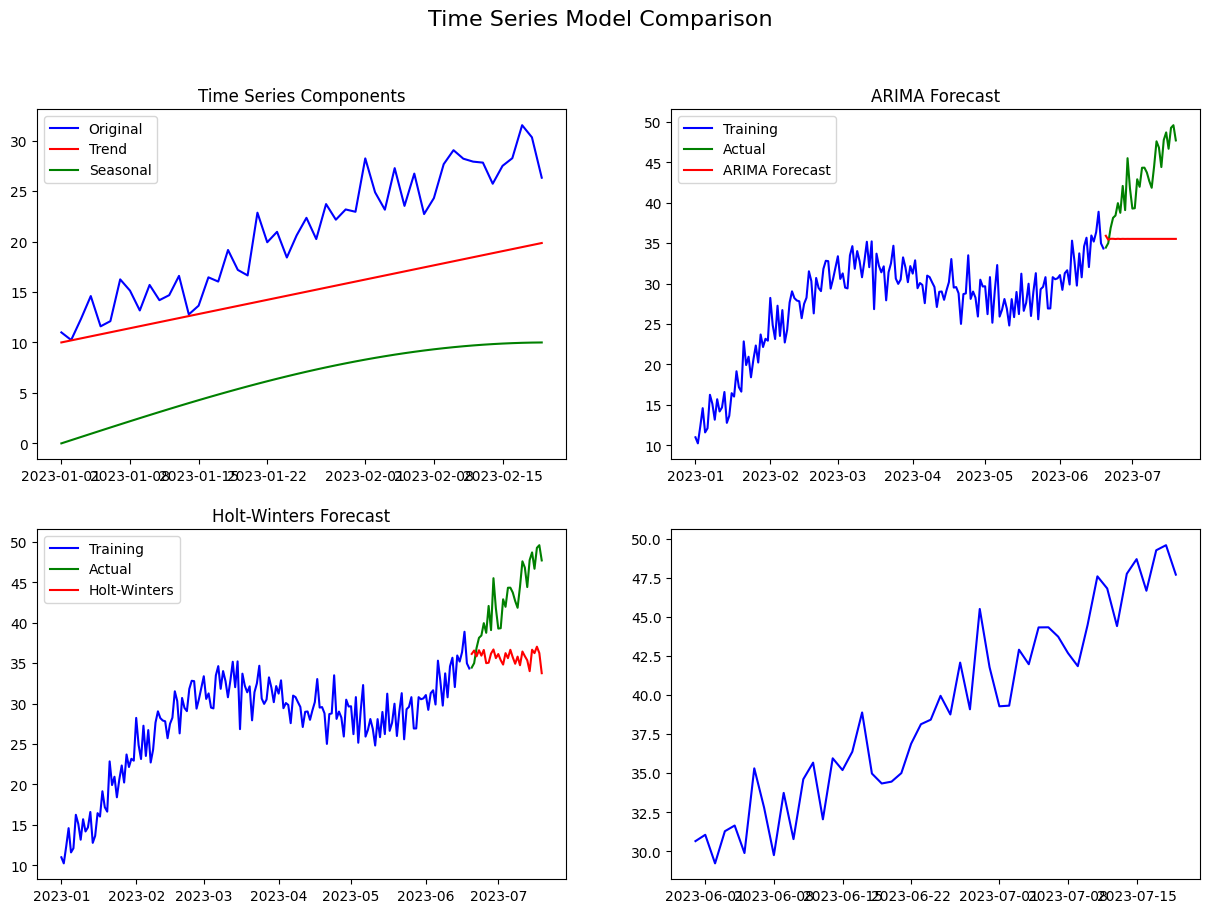

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

class TimeSeriesModelComparison:
    def __init__(self):
        # Generate simulated data
        np.random.seed(42)
        self.n = 200
        self.time = pd.date_range(start="2023-01-01", periods=self.n, freq="D")
        self.trend = np.linspace(10, 50, self.n)
        self.seasonality = 10 * np.sin(np.linspace(0, 2 * np.pi, self.n))
        self.noise = np.random.normal(0, 2, self.n)
        self.data = self.trend + self.seasonality + self.noise

        # Prepare data and fit models
        self.prepare_data_and_models()

    def prepare_data_and_models(self):
        # Create DataFrame
        self.df = pd.DataFrame({"value": self.data}, index=self.time)

        # Train-test split
        self.train = self.df.iloc[:-30]
        self.test = self.df.iloc[-30:]

        # Fit ARIMA
        arima_model = ARIMA(self.train, order=(2,1,2))
        self.arima_result = arima_model.fit()
        self.arima_forecast = self.arima_result.forecast(steps=30)

        # Fit Holt-Winters
        hw_model = ExponentialSmoothing(
            self.train, seasonal="add", seasonal_periods=30
        ).fit()
        self.hw_forecast = hw_model.forecast(30)

        # Prepare and fit LSTM
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(self.df.values)

        def create_sequences(data, seq_length=10):
            X, y = [], []
            for i in range(len(data) - seq_length):
                X.append(data[i:i+seq_length])
                y.append(data[i+seq_length])
            return np.array(X), np.array(y)

        X, y = create_sequences(scaled_data)
        train_size = int(len(X) * 0.85)

        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(50, activation='relu', input_shape=(10, 1)),
            tf.keras.layers.Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X[:train_size], y[:train_size], epochs=50, batch_size=8, verbose=0)

        self.lstm_pred = model.predict(X[train_size:])
        self.lstm_pred = scaler.inverse_transform(self.lstm_pred)

    def create_animation(self):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Time Series Model Comparison', fontsize=16)

        def animate(frame):
            # Clear all axes
            for ax in [ax1, ax2, ax3, ax4]:
                ax.clear()

            # Window size for visualization
            window = 50
            start_idx = frame % (len(self.df) - window)
            end_idx = start_idx + window

            # Plot 1: Original Data and Decomposition
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.df.values[start_idx:end_idx],
                    label='Original', color='blue')
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.trend[start_idx:end_idx],
                    label='Trend', color='red')
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.seasonality[start_idx:end_idx],
                    label='Seasonal', color='green')
            ax1.set_title('Time Series Components')
            ax1.legend()

            # Plot 2: ARIMA Forecast
            ax2.plot(self.train.index[start_idx:],
                    self.train.values[start_idx:],
                    label='Training', color='blue')
            ax2.plot(self.test.index,
                    self.test.values,
                    label='Actual', color='green')
            ax2.plot(self.test.index,
                    self.arima_forecast,
                    label='ARIMA Forecast', color='red')
            ax2.set_title('ARIMA Forecast')
            ax2.legend()

            # Plot 3: Holt-Winters Forecast
            ax3.plot(self.train.index[start_idx:],
                    self.train.values[start_idx:],
                    label='Training', color='blue')
            ax3.plot(self.test.index,
                    self.test.values,
                    label='Actual', color='green')
            ax3.plot(self.test.index,
                    self.hw_forecast,
                    label='Holt-Winters', color='red')
            ax3.set_title('Holt-Winters Forecast')
            ax3.legend()

            # Plot 4: LSTM Forecast
            ax4.plot(self.df.index[-50:],
                    self.df.values[-50:],
                    label='Actual', color='blue')
            ax4.plot(self.df.index[-40:],
                    self.lstm_pred[-40:],
                    label='LSTM Forecast', color='red')
            ax4.set_title('LSTM Forecast')
            ax4.legend()

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        anim = FuncAnimation(fig, animate,
                           frames=len(self.df)-50,
                           interval=200, repeat=True)
        return anim

# Create and save animation
visualizer = TimeSeriesModelComparison()
anim = visualizer.create_animation()
anim.save('time_series_models.gif', writer='pillow', fps=10)
plt.close()


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

class ExponentialSmoothingVisualizer:
    def __init__(self):
        # Generate synthetic data
        np.random.seed(42)
        self.n_points = 100
        self.time = np.arange(self.n_points)

        # Simple data (constant with noise)
        self.simple_data = 10 + np.random.normal(scale=0.5, size=self.n_points)

        # Data with trend
        self.trend_data = 10 + 0.5 * self.time + np.random.normal(scale=1.0, size=self.n_points)

        # Data with trend and seasonality
        self.seasonal_data = (10 + 0.5 * self.time +
                            2 * np.sin(2 * np.pi * self.time / 12) +
                            np.random.normal(scale=1.0, size=self.n_points))

        # Fit models
        self.fit_models()

    def fit_models(self):
        # Simple Exponential Smoothing
        ses_model = SimpleExpSmoothing(self.simple_data)
        self.ses_fit = ses_model.fit(smoothing_level=0.5)

        # Double Exponential Smoothing
        des_model = ExponentialSmoothing(self.trend_data, trend='add')
        self.des_fit = des_model.fit(smoothing_level=0.5, smoothing_trend=0.5)

        # Triple Exponential Smoothing (Holt-Winters)
        hw_model = ExponentialSmoothing(self.seasonal_data,
                                      trend='add',
                                      seasonal='add',
                                      seasonal_periods=12)
        self.hw_fit = hw_model.fit(smoothing_level=0.5,
                                  smoothing_trend=0.5,
                                  smoothing_seasonal=0.5)

    def create_animation(self):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
        fig.suptitle('Exponential Smoothing Methods', fontsize=16)

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Window size for visualization
            window = 30
            start_idx = frame % (self.n_points - window)
            end_idx = start_idx + window

            # Plot 1: Simple Exponential Smoothing
            ax1.plot(self.time[start_idx:end_idx],
                    self.simple_data[start_idx:end_idx],
                    'o-', label='Original', alpha=0.5)
            ax1.plot(self.time[start_idx:end_idx],
                    self.ses_fit.fittedvalues[start_idx:end_idx],
                    'r-', label='SES', linewidth=2)
            ax1.set_title('Simple Exponential Smoothing')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Double Exponential Smoothing
            ax2.plot(self.time[start_idx:end_idx],
                    self.trend_data[start_idx:end_idx],
                    'o-', label='Original', alpha=0.5)
            ax2.plot(self.time[start_idx:end_idx],
                    self.des_fit.fittedvalues[start_idx:end_idx],
                    'r-', label='DES', linewidth=2)
            ax2.set_title('Double Exponential Smoothing (with Trend)')
            ax2.legend()
            ax2.grid(True)

            # Plot 3: Triple Exponential Smoothing
            ax3.plot(self.time[start_idx:end_idx],
                    self.seasonal_data[start_idx:end_idx],
                    'o-', label='Original', alpha=0.5)
            ax3.plot(self.time[start_idx:end_idx],
                    self.hw_fit.fittedvalues[start_idx:end_idx],
                    'r-', label='Holt-Winters', linewidth=2)
            ax3.set_title('Triple Exponential Smoothing (Holt-Winters)')
            ax3.legend()
            ax3.grid(True)

            # Add explanatory text
            ax1.text(0.02, 0.98, 'Handles constant level with noise',
                    transform=ax1.transAxes, verticalalignment='top')
            ax2.text(0.02, 0.98, 'Handles trend + noise',
                    transform=ax2.transAxes, verticalalignment='top')
            ax3.text(0.02, 0.98, 'Handles trend + seasonality + noise',
                    transform=ax3.transAxes, verticalalignment='top')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        anim = FuncAnimation(fig, animate,
                           frames=self.n_points,
                           interval=500, repeat=True)
        return anim

# Create and save animation
visualizer = ExponentialSmoothingVisualizer()
anim = visualizer.create_animation()
anim.save('exponential_smoothing.gif', writer='pillow', fps=5)
plt.close()


/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

class TimeSeriesModelComparison:
    def __init__(self):
        # Generate simulated data
        np.random.seed(42)
        self.n = 200
        self.time = pd.date_range(start="2023-01-01", periods=self.n, freq="D")
        self.trend = np.linspace(10, 50, self.n)
        self.seasonality = 10 * np.sin(np.linspace(0, 2 * np.pi, self.n))
        self.noise = np.random.normal(0, 2, self.n)
        self.data = self.trend + self.seasonality + self.noise

        # Prepare data and fit models
        self.prepare_data_and_models()

    def prepare_data_and_models(self):
        # Create DataFrame
        self.df = pd.DataFrame({"value": self.data}, index=self.time)

        # Train-test split
        self.train = self.df.iloc[:-30]
        self.test = self.df.iloc[-30:]

        # Fit ARIMA
        arima_model = ARIMA(self.train, order=(2,1,2))
        self.arima_result = arima_model.fit()
        self.arima_forecast = self.arima_result.forecast(steps=30)

        # Fit Holt-Winters
        hw_model = ExponentialSmoothing(
            self.train, seasonal="add", seasonal_periods=30
        ).fit()
        self.hw_forecast = hw_model.forecast(30)

    def create_animation(self):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Time Series Model Comparison', fontsize=16)

        def animate(frame):
            # Clear all axes
            for ax in [ax1, ax2, ax3, ax4]:
                ax.clear()

            # Window size for visualization
            window = 50
            start_idx = frame % (len(self.df) - window)
            end_idx = start_idx + window

            # Plot 1: Original Data and Decomposition
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.df.values[start_idx:end_idx],
                    label='Original', color='blue')
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.trend[start_idx:end_idx],
                    label='Trend', color='red')
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.seasonality[start_idx:end_idx],
                    label='Seasonal', color='green')
            ax1.set_title('Time Series Components')
            ax1.legend()

            # Plot 2: ARIMA Forecast
            ax2.plot(self.train.index[start_idx:],
                    self.train.values[start_idx:],
                    label='Training', color='blue')
            ax2.plot(self.test.index,
                    self.test.values,
                    label='Actual', color='green')
            ax2.plot(self.test.index,
                    self.arima_forecast,
                    label='ARIMA Forecast', color='red')
            ax2.set_title('ARIMA Forecast')
            ax2.legend()

            # Plot 3: Holt-Winters Forecast
            ax3.plot(self.train.index[start_idx:],
                    self.train.values[start_idx:],
                    label='Training', color='blue')
            ax3.plot(self.test.index,
                    self.test.values,
                    label='Actual', color='green')
            ax3.plot(self.test.index,
                    self.hw_forecast,
                    label='Holt-Winters', color='red')
            ax3.set_title('Holt-Winters Forecast')
            ax3.legend()

            # Plot 4: Model Comparison
            ax4.plot(self.test.index,
                    self.test.values,
                    label='Actual', color='blue')
            ax4.plot(self.test.index,
                    self.arima_forecast,
                    label='ARIMA', color='red')
            ax4.plot(self.test.index,
                    self.hw_forecast,
                    label='Holt-Winters', color='green')
            ax4.set_title('Model Comparison')
            ax4.legend()

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            # Format dates on x-axis
            for ax in [ax1, ax2, ax3, ax4]:
                ax.tick_params(axis='x', rotation=45)

        anim = FuncAnimation(fig, animate,
                           frames=len(self.df)-50,
                           interval=200, repeat=True)
        return anim

# Create and save animation
visualizer = TimeSeriesModelComparison()
anim = visualizer.create_animation()
anim.save('time_series_models.gif', writer='pillow', fps=10)
plt.close()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

class TimeSeriesModelComparison:
    def __init__(self):
        # Generate simulated data
        np.random.seed(42)
        self.n = 200
        self.time = pd.date_range(start="2023-01-01", periods=self.n, freq="D")
        self.trend = np.linspace(10, 50, self.n)
        self.seasonality = 10 * np.sin(np.linspace(0, 2 * np.pi, self.n))
        self.noise = np.random.normal(0, 2, self.n)
        self.data = self.trend + self.seasonality + self.noise

        # Prepare data and fit models
        self.prepare_data_and_models()

    def prepare_data_and_models(self):
        # Create DataFrame
        self.df = pd.DataFrame({"value": self.data}, index=self.time)

        # Train-test split
        self.train = self.df.iloc[:-30]
        self.test = self.df.iloc[-30:]

        # Fit ARIMA
        arima_model = ARIMA(self.train, order=(2,1,2))
        self.arima_result = arima_model.fit()
        self.arima_forecast = self.arima_result.forecast(steps=30)

        # Fit Holt-Winters
        hw_model = ExponentialSmoothing(
            self.train, seasonal="add", seasonal_periods=30
        ).fit()
        self.hw_forecast = hw_model.forecast(30)

    def create_animation(self):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Time Series Model Comparison', fontsize=16)

        def animate(frame):
            # Clear all axes
            for ax in [ax1, ax2, ax3, ax4]:
                ax.clear()

            # Window size for visualization
            window = 50
            start_idx = (frame // 2) % (len(self.df) - window)  # Slow down animation
            end_idx = start_idx + window

            # Plot 1: Original Data and Decomposition
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.df.values[start_idx:end_idx],
                    label='Original', color='blue')
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.trend[start_idx:end_idx],
                    label='Trend', color='red')
            ax1.plot(self.df.index[start_idx:end_idx],
                    self.seasonality[start_idx:end_idx],
                    label='Seasonal', color='green')
            ax1.set_title('Time Series Components')
            ax1.legend()

            # Plot 2: ARIMA Forecast
            train_end = len(self.train)
            visible_start = max(start_idx, train_end - window)
            ax2.plot(self.train.index[visible_start:train_end],
                    self.train.values[visible_start:train_end],
                    label='Training', color='blue')
            ax2.plot(self.test.index,
                    self.test.values,
                    label='Actual', color='green')
            ax2.plot(self.test.index,
                    self.arima_forecast,
                    label='ARIMA Forecast', color='red')
            ax2.set_title('ARIMA Forecast')
            ax2.legend()

            # Plot 3: Holt-Winters Forecast
            ax3.plot(self.train.index[visible_start:train_end],
                    self.train.values[visible_start:train_end],
                    label='Training', color='blue')
            ax3.plot(self.test.index,
                    self.test.values,
                    label='Actual', color='green')
            ax3.plot(self.test.index,
                    self.hw_forecast,
                    label='Holt-Winters', color='red')
            ax3.set_title('Holt-Winters Forecast')
            ax3.legend()

            # Plot 4: Model Comparison (with moving window)
            test_window = 20
            test_start = max(0, (frame // 2) % (len(self.test) - test_window))
            test_end = test_start + test_window

            ax4.plot(self.test.index[test_start:test_end],
                    self.test.values[test_start:test_end],
                    label='Actual', color='blue')
            ax4.plot(self.test.index[test_start:test_end],
                    self.arima_forecast[test_start:test_end],
                    label='ARIMA', color='red')
            ax4.plot(self.test.index[test_start:test_end],
                    self.hw_forecast[test_start:test_end],
                    label='Holt-Winters', color='green')
            ax4.set_title('Model Comparison')
            ax4.legend()

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            # Format dates on x-axis
            for ax in [ax1, ax2, ax3, ax4]:
                ax.tick_params(axis='x', rotation=45)

        anim = FuncAnimation(fig, animate,
                           frames=(len(self.df)-50) * 2,  # Double frames to slow down
                           interval=500,  # Increased interval
                           repeat=True)
        return anim

# Create and save animation
visualizer = TimeSeriesModelComparison()
anim = visualizer.create_animation()
anim.save('time_series_models.gif', writer='pillow', fps=5)  # Reduced fps
plt.close()


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

class FeatureEngineeringVisualizer:
    def __init__(self):
        # Generate synthetic time series data
        np.random.seed(42)
        self.n_points = 200
        self.time = np.linspace(0, 4*np.pi, self.n_points)

        # Create base signal with trend and seasonality
        self.trend = 0.5 * self.time
        self.seasonality = 10 * np.sin(self.time)
        self.noise = np.random.normal(0, 1, self.n_points)
        self.data = self.trend + self.seasonality + self.noise

        # Calculate features
        self.calculate_features()

    def calculate_features(self):
        # Scaling
        self.scaler = MinMaxScaler()
        self.scaled_data = self.scaler.fit_transform(self.data.reshape(-1, 1)).flatten()

        # Differencing
        self.diff = np.diff(self.data)

        # Rolling statistics
        self.rolling_mean = pd.Series(self.data).rolling(window=20).mean()
        self.rolling_std = pd.Series(self.data).rolling(window=20).std()

        # Rate of change
        self.roc = np.gradient(self.data)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(3, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Original series decomposition
        ax2 = fig.add_subplot(gs[1, 0])  # Scaled data
        ax3 = fig.add_subplot(gs[1, 1])  # Differencing
        ax4 = fig.add_subplot(gs[2, 0])  # Rolling statistics
        ax5 = fig.add_subplot(gs[2, 1])  # Rate of change

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3, ax4, ax5]:
                ax.clear()

            # Window size for visualization
            window = 50
            start_idx = frame % (self.n_points - window)
            end_idx = start_idx + window

            # Plot 1: Original series decomposition
            ax1.plot(self.time[start_idx:end_idx],
                    self.data[start_idx:end_idx],
                    label='Original', color='blue')
            ax1.plot(self.time[start_idx:end_idx],
                    self.trend[start_idx:end_idx],
                    label='Trend', color='red')
            ax1.plot(self.time[start_idx:end_idx],
                    self.seasonality[start_idx:end_idx],
                    label='Seasonal', color='green')
            ax1.set_title('Time Series Components')
            ax1.legend()

            # Plot 2: Scaled data
            ax2.plot(self.time[start_idx:end_idx],
                    self.data[start_idx:end_idx],
                    label='Original', alpha=0.5)
            ax2.plot(self.time[start_idx:end_idx],
                    self.scaled_data[start_idx:end_idx],
                    label='Scaled')
            ax2.set_title('Min-Max Scaling')
            ax2.legend()

            # Plot 3: Differencing
            if start_idx < len(self.diff):
                ax3.plot(self.time[start_idx+1:end_idx],
                        self.diff[start_idx:end_idx-1],
                        label='First Difference')
                ax3.axhline(y=0, color='r', linestyle='--')
            ax3.set_title('First Difference')
            ax3.legend()

            # Plot 4: Rolling statistics
            ax4.plot(self.time[start_idx:end_idx],
                    self.data[start_idx:end_idx],
                    label='Original', alpha=0.5)
            ax4.plot(self.time[start_idx:end_idx],
                    self.rolling_mean[start_idx:end_idx],
                    label='Rolling Mean')
            ax4.fill_between(self.time[start_idx:end_idx],
                           self.rolling_mean[start_idx:end_idx] - self.rolling_std[start_idx:end_idx],
                           self.rolling_mean[start_idx:end_idx] + self.rolling_std[start_idx:end_idx],
                           alpha=0.2)
            ax4.set_title('Rolling Statistics')
            ax4.legend()

            # Plot 5: Rate of change
            ax5.plot(self.time[start_idx:end_idx],
                    self.roc[start_idx:end_idx],
                    label='Rate of Change')
            ax5.axhline(y=0, color='r', linestyle='--')
            ax5.set_title('Rate of Change')
            ax5.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=self.n_points,
                           interval=200,  # 100ms between frames
                           repeat=True)
        return anim

# Create and save animation
visualizer = FeatureEngineeringVisualizer()
anim = visualizer.create_animation()
anim.save('feature_engineering.gif', writer='pillow', fps=5)
plt.close()


IndexError: index 50 is out of bounds for axis 0 with size 50

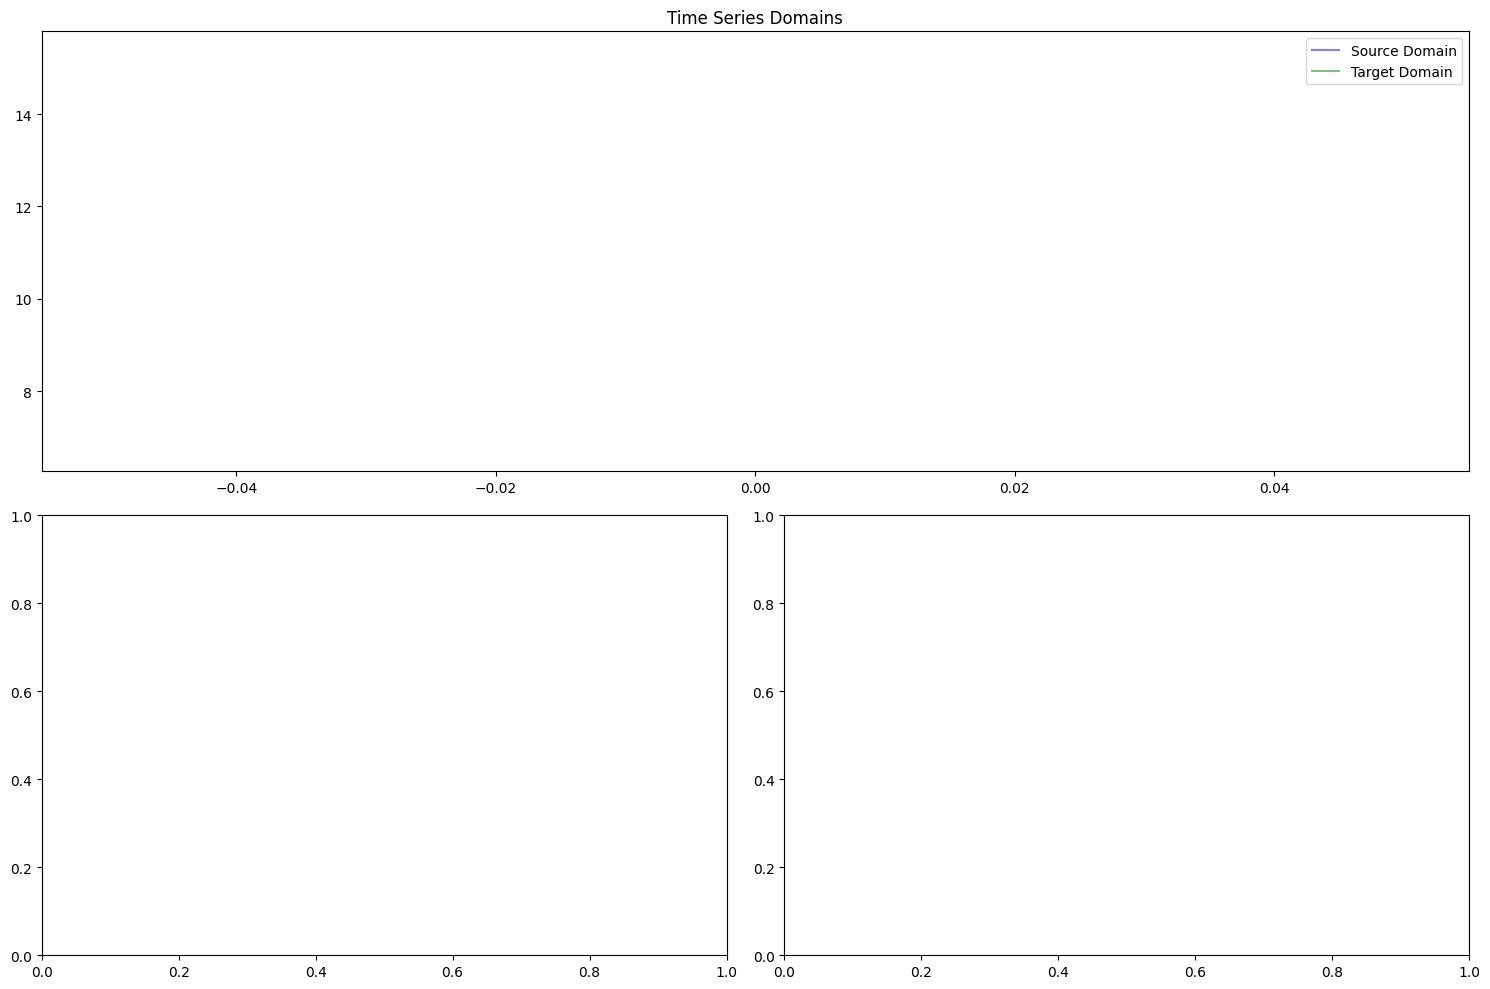

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class TransferLearningVisualizer:
    def __init__(self):
        # Generate source domain data (e.g., office energy consumption)
        self.n_points = 200
        self.time = np.linspace(0, 4*np.pi, self.n_points)

        # Source domain: Office energy consumption pattern
        self.source_trend = np.linspace(10, 30, self.n_points)
        self.source_seasonal = 10 * np.sin(self.time) + 5 * np.cos(self.time * 2)
        self.source_noise = np.random.normal(0, 1, self.n_points)
        self.source_data = self.source_trend + self.source_seasonal + self.source_noise

        # Target domain: Residential energy consumption (similar pattern but different scale)
        self.target_trend = np.linspace(5, 15, self.n_points)
        self.target_seasonal = 5 * np.sin(self.time) + 2.5 * np.cos(self.time * 2)
        self.target_noise = np.random.normal(0, 0.5, self.n_points)
        self.target_data = self.target_trend + self.target_seasonal + self.target_noise

        # Simulate transfer learning process
        self.simulate_transfer_learning()

    def simulate_transfer_learning(self):
        # Simulate adaptation process
        self.adaptation_steps = []
        alpha = np.linspace(0, 1, 50)  # Adaptation weight

        for a in alpha:
            # Gradually adapt source patterns to target scale
            adapted_trend = self.source_trend * (1-a) + self.target_trend * a
            adapted_seasonal = self.source_seasonal * (1-a) + self.target_seasonal * a
            adapted = adapted_trend + adapted_seasonal + self.target_noise
            self.adaptation_steps.append(adapted)

        self.adaptation_steps = np.array(self.adaptation_steps)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Source and target domains
        ax2 = fig.add_subplot(gs[1, 0])  # Feature space
        ax3 = fig.add_subplot(gs[1, 1])  # Learning progress

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Plot 1: Source and target domains
            window = 50
            start_idx = max(0, frame - window)
            end_idx = frame + 1

            ax1.plot(self.time[start_idx:end_idx],
                    self.source_data[start_idx:end_idx],
                    'b-', label='Source Domain', alpha=0.5)
            ax1.plot(self.time[start_idx:end_idx],
                    self.target_data[start_idx:end_idx],
                    'g-', label='Target Domain', alpha=0.5)

            # Show adaptation if in adaptation phase
            if frame >= len(self.time) - len(self.adaptation_steps):
                adaptation_idx = frame - (len(self.time) - len(self.adaptation_steps))
                ax1.plot(self.time[start_idx:end_idx],
                        self.adaptation_steps[adaptation_idx][start_idx:end_idx],
                        'r-', label='Adapted Model', linewidth=2)

            ax1.set_title('Time Series Domains')
            ax1.legend()

            # Plot 2: Feature space visualization
            if frame > 0:
                # Create feature space using time-delay embedding
                delay = 5
                source_features = np.column_stack((self.source_data[:-delay],
                                                 self.source_data[delay:]))
                target_features = np.column_stack((self.target_data[:-delay],
                                                 self.target_data[delay:]))

                ax2.scatter(source_features[:, 0], source_features[:, 1],
                          c='blue', alpha=0.3, label='Source Features')
                ax2.scatter(target_features[:, 0], target_features[:, 1],
                          c='green', alpha=0.3, label='Target Features')

                if frame >= len(self.time) - len(self.adaptation_steps):
                    adaptation_idx = frame - (len(self.time) - len(self.adaptation_steps))
                    adapted_features = np.column_stack((
                        self.adaptation_steps[adaptation_idx][:-delay],
                        self.adaptation_steps[adaptation_idx][delay:]
                    ))
                    ax2.scatter(adapted_features[:, 0], adapted_features[:, 1],
                              c='red', alpha=0.5, label='Adapted Features')

                ax2.set_title('Feature Space')
                ax2.legend()

            # Plot 3: Learning progress
            if frame >= len(self.time) - len(self.adaptation_steps):
                adaptation_idx = frame - (len(self.time) - len(self.adaptation_steps))
                progress = np.arange(adaptation_idx + 1) / len(self.adaptation_steps)
                error = np.abs(self.adaptation_steps[:adaptation_idx+1].mean(axis=1) -
                             self.target_data.mean())

                ax3.plot(progress, error, 'r-', label='Adaptation Error')
                ax3.set_title('Transfer Learning Progress')
                ax3.set_xlabel('Adaptation Progress')
                ax3.set_ylabel('Error')
                ax3.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=len(self.time) + len(self.adaptation_steps) - 1,
                           interval=100, repeat=True)
        return anim

# Create and save animation
visualizer = TransferLearningVisualizer()
anim = visualizer.create_animation()
anim.save('transfer_learning.gif', writer='pillow', fps=10)
plt.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import StandardScaler

class TSClassificationVisualizer:
    def __init__(self):
        # Generate synthetic time series data for different classes
        np.random.seed(42)
        self.n_samples = 100
        self.n_timesteps = 100

        # Class 1: Sine wave with noise
        t = np.linspace(0, 4*np.pi, self.n_timesteps)
        self.class1 = np.array([np.sin(t) + np.random.normal(0, 0.2, self.n_timesteps)
                               for _ in range(self.n_samples)])

        # Class 2: Square wave with noise
        self.class2 = np.array([np.where(np.sin(t) > 0, 1, -1) +
                               np.random.normal(0, 0.2, self.n_timesteps)
                               for _ in range(self.n_samples)])

        # Prepare features and classifications
        self.prepare_data()

    def prepare_data(self):
        # Extract features
        self.features1 = self.extract_features(self.class1)
        self.features2 = self.extract_features(self.class2)

        # Compute DTW matrix for visualization
        self.dtw_matrix = self.compute_dtw_matrix(self.class1[0], self.class2[0])

        # Prepare CNN features (simplified representation)
        self.cnn_features = self.simulate_cnn_features()

    def extract_features(self, data):
        return np.array([[
            np.mean(series),
            np.std(series),
            np.percentile(series, 75) - np.percentile(series, 25)
        ] for series in data])

    def compute_dtw_matrix(self, s1, s2):
        n, m = len(s1), len(s2)
        dtw_matrix = np.zeros((n, m))
        for i in range(n):
            for j in range(m):
                cost = (s1[i] - s2[j])**2
                if i > 0 and j > 0:
                    dtw_matrix[i,j] = cost + min(dtw_matrix[i-1,j],
                                               dtw_matrix[i,j-1],
                                               dtw_matrix[i-1,j-1])
                elif i > 0:
                    dtw_matrix[i,j] = cost + dtw_matrix[i-1,j]
                elif j > 0:
                    dtw_matrix[i,j] = cost + dtw_matrix[i,j-1]
                else:
                    dtw_matrix[i,j] = cost
        return dtw_matrix

    def simulate_cnn_features(self):
        # Simulate CNN feature extraction process
        features = []
        for i in range(self.n_timesteps - 10):
            feature = np.mean(self.class1[0][i:i+10])
            features.append(feature)
        return np.array(features)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Time series and features
        ax2 = fig.add_subplot(gs[1, 0])  # DTW alignment
        ax3 = fig.add_subplot(gs[1, 1])  # Deep learning features

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Plot 1: Time series and feature extraction
            window = 50
            start_idx = frame % (self.n_timesteps - window)
            end_idx = start_idx + window

            # Plot original series
            ax1.plot(self.class1[0][start_idx:end_idx],
                    label='Class 1', color='blue')
            ax1.plot(self.class2[0][start_idx:end_idx],
                    label='Class 2', color='red')

            # Highlight features being extracted
            if frame % 3 == 0:
                current_window = self.class1[0][start_idx:end_idx]
                ax1.axhline(y=np.mean(current_window), color='green',
                           linestyle='--', label='Mean')
                ax1.axhspan(np.percentile(current_window, 25),
                           np.percentile(current_window, 75),
                           color='yellow', alpha=0.3, label='IQR')

            ax1.set_title('Time Series Classification')
            ax1.legend()

            # Plot 2: DTW alignment
            im = ax2.imshow(self.dtw_matrix[:end_idx, :end_idx],
                          aspect='auto', cmap='viridis')
            ax2.set_title('DTW Alignment Matrix')
            plt.colorbar(im, ax=ax2)

            # Plot 3: Deep learning feature extraction
            ax3.plot(self.cnn_features[:end_idx],
                    label='CNN Features', color='purple')
            ax3.axvline(x=frame, color='red', linestyle='--')
            ax3.set_title('Deep Learning Features')
            ax3.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=self.n_timesteps,
                           interval=100, repeat=True)
        return anim

# Create and save animation
visualizer = TSClassificationVisualizer()
anim = visualizer.create_animation()
anim.save('ts_classification.gif', writer='pillow', fps=10)
plt.close()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec

class TimeSeriesVisualizer:
    def __init__(self):
        # Generate synthetic time series data
        np.random.seed(42)
        self.n_points = 200
        self.time = np.linspace(0, 4*np.pi, self.n_points)

        # Create base signal with multiple components
        self.trend = 0.5 * self.time
        self.seasonality = 10 * np.sin(self.time)
        self.noise = np.random.normal(0, 1, self.n_points)
        self.data = self.trend + self.seasonality + self.noise

        # Calculate derived series
        self.calculate_derived_series()

    def calculate_derived_series(self):
        # Moving average
        window = 20
        self.moving_avg = np.convolve(self.data,
                                    np.ones(window)/window,
                                    mode='valid')

        # First difference
        self.diff = np.diff(self.data)

        # Seasonal decomposition (simplified)
        self.seasonal_pattern = 10 * np.sin(self.time)
        self.residuals = self.data - (self.trend + self.seasonal_pattern)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = GridSpec(3, 2, figure=fig)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Original series
        ax2 = fig.add_subplot(gs[1, 0])  # Moving average
        ax3 = fig.add_subplot(gs[1, 1])  # First difference
        ax4 = fig.add_subplot(gs[2, 0])  # Components
        ax5 = fig.add_subplot(gs[2, 1])  # Distribution

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3, ax4, ax5]:
                ax.clear()

            # Window size for visualization
            window = 50
            start_idx = frame % (self.n_points - window)
            end_idx = start_idx + window

            # Plot 1: Original time series
            ax1.plot(self.time[start_idx:end_idx],
                    self.data[start_idx:end_idx],
                    'b-', label='Original Series')
            ax1.set_title('Raw Time Series')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Moving average
            if start_idx >= window:
                ax2.plot(self.time[start_idx:end_idx],
                        self.data[start_idx:end_idx],
                        'b-', alpha=0.5, label='Original')
                ax2.plot(self.time[start_idx:end_idx],
                        self.moving_avg[start_idx-window:end_idx-window],
                        'r-', label='Moving Average')
            ax2.set_title('Moving Average')
            ax2.legend()
            ax2.grid(True)

            # Plot 3: First difference
            if start_idx < len(self.diff):
                ax3.plot(self.time[start_idx+1:end_idx],
                        self.diff[start_idx:end_idx-1],
                        'g-', label='First Difference')
                ax3.axhline(y=0, color='k', linestyle='--')
            ax3.set_title('First Difference')
            ax3.legend()
            ax3.grid(True)

            # Plot 4: Components
            ax4.plot(self.time[start_idx:end_idx],
                    self.trend[start_idx:end_idx],
                    'r-', label='Trend')
            ax4.plot(self.time[start_idx:end_idx],
                    self.seasonal_pattern[start_idx:end_idx],
                    'g-', label='Seasonal')
            ax4.plot(self.time[start_idx:end_idx],
                    self.residuals[start_idx:end_idx],
                    'b-', alpha=0.5, label='Residual')
            ax4.set_title('Decomposition')
            ax4.legend()
            ax4.grid(True)

            # Plot 5: Distribution
            ax5.hist(self.data[start_idx:end_idx],
                    bins=20, density=True, alpha=0.7)
            ax5.set_title('Distribution')
            ax5.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=self.n_points,
                           interval=100, repeat=True)
        return anim

# Create and save animation
visualizer = TimeSeriesVisualizer()
anim = visualizer.create_animation()
anim.save('time_series_viz.gif', writer='pillow', fps=10)
plt.close()


<ipython-input-16-529e4b039b8d>:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class HistogramVisualizer:
    def __init__(self):
        # Parameters for normal distribution
        self.mean = 100
        self.std = 15
        self.n_total = 1000

        # Generate all data upfront
        np.random.seed(42)
        self.all_data = np.random.normal(self.mean, self.std, self.n_total)

        # Initialize storage for count and current value
        self.count = 0
        self.current_value = None
        self.collected_data = []

    def create_animation(self):
        fig = plt.figure(figsize=(12, 8))

        # Create grid for subplots
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax_count = fig.add_subplot(gs[0, 0])      # Count display
        ax_current = fig.add_subplot(gs[0, 1])    # Current value display
        ax_hist = fig.add_subplot(gs[1, :])       # Histogram

        def animate(frame):
            # Clear all axes
            ax_count.clear()
            ax_current.clear()
            ax_hist.clear()

            # Update count and data
            self.count = frame + 1
            self.current_value = self.all_data[frame]
            self.collected_data.append(self.current_value)

            # Plot 1: Count Display
            ax_count.text(0.5, 0.5, f"Count: {self.count}",
                         ha='center', va='center', fontsize=20)
            ax_count.axis('off')

            # Plot 2: Current Value Display
            ax_current.text(0.5, 0.5, f"Current Value: {self.current_value:.2f}",
                          ha='center', va='center', fontsize=20)
            ax_current.axis('off')

            # Plot 3: Growing Histogram
            n_bins = int(np.sqrt(len(self.collected_data)))  # Dynamic bin size

            # Plot histogram
            n, bins, patches = ax_hist.hist(self.collected_data,
                                          bins=max(10, n_bins),
                                          density=True,
                                          alpha=0.7,
                                          color='skyblue',
                                          edgecolor='black')

            # Plot normal distribution curve
            if len(self.collected_data) > 1:
                sample_mean = np.mean(self.collected_data)
                sample_std = np.std(self.collected_data)
                x = np.linspace(min(bins), max(bins), 100)
                normal_dist = (1/(sample_std * np.sqrt(2*np.pi)) *
                             np.exp(-(x-sample_mean)**2 / (2*sample_std**2)))
                ax_hist.plot(x, normal_dist, 'r-', lw=2,
                           label='Normal Distribution')

            # Add vertical line for current value
            ax_hist.axvline(x=self.current_value, color='red',
                          linestyle='--', alpha=0.5)

            # Customize histogram
            ax_hist.set_title('Growing Histogram')
            ax_hist.set_xlabel('Value')
            ax_hist.set_ylabel('Density')

            # Add mean and std dev
            if len(self.collected_data) > 1:
                stats_text = (f'Mean: {sample_mean:.2f}\n'
                            f'Std Dev: {sample_std:.2f}')
                ax_hist.text(0.02, 0.98, stats_text,
                           transform=ax_hist.transAxes,
                           verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=min(1000, self.n_total),  # Limit to 100 frames
                           interval=100,  # 100ms between frames
                           repeat=False)
        return anim

# Create and save animation
visualizer = HistogramVisualizer()
anim = visualizer.create_animation()
anim.save('growing_histogram.gif', writer='pillow', fps=10)
plt.close()


<ipython-input-18-dde0c2b8130f>:69: RuntimeWarning: divide by zero encountered in scalar divide
  normal_dist = (1/(sample_std * np.sqrt(2*np.pi)) *
<ipython-input-18-dde0c2b8130f>:70: RuntimeWarning: divide by zero encountered in divide
  np.exp(-(x-sample_mean)**2 / (2*sample_std**2)))
<ipython-input-18-dde0c2b8130f>:69: RuntimeWarning: invalid value encountered in multiply
  normal_dist = (1/(sample_std * np.sqrt(2*np.pi)) *


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class TransferLearningVisualizer:
    def __init__(self):
        # Generate source domain data
        np.random.seed(42)
        self.n_points = 200
        self.time = np.linspace(0, 4*np.pi, self.n_points)

        # Source domain data
        self.source_trend = np.linspace(10, 30, self.n_points)
        self.source_seasonal = 10 * np.sin(self.time) + 5 * np.cos(self.time * 2)
        self.source_noise = np.random.normal(0, 1, self.n_points)
        self.source_data = self.source_trend + self.source_seasonal + self.source_noise

        # Target domain data
        self.target_trend = np.linspace(5, 15, self.n_points)
        self.target_seasonal = 5 * np.sin(self.time) + 2.5 * np.cos(self.time * 2)
        self.target_noise = np.random.normal(0, 0.5, self.n_points)
        self.target_data = self.target_trend + self.target_seasonal + self.target_noise

        # Initialize adaptation
        self.adaptation_steps = []
        self.errors = []
        self.simulate_transfer_learning()

    def simulate_transfer_learning(self):
        n_steps = 50
        alpha = np.linspace(0, 1, n_steps)

        for a in alpha:
            # Adapt source to target domain
            adapted_trend = self.source_trend * (1-a) + self.target_trend * a
            adapted_seasonal = self.source_seasonal * (1-a) + self.target_seasonal * a
            adapted = adapted_trend + adapted_seasonal + self.target_noise

            # Store adaptation and compute error
            self.adaptation_steps.append(adapted)
            error = np.mean((adapted - self.target_data)**2)
            self.errors.append(error)

        self.adaptation_steps = np.array(self.adaptation_steps)
        self.errors = np.array(self.errors)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        ax1 = fig.add_subplot(gs[0, :])    # Time series
        ax2 = fig.add_subplot(gs[1, 0])    # Feature space
        ax3 = fig.add_subplot(gs[1, 1])    # Learning progress

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Plot 1: Time Series
            window = 50
            start_idx = max(0, frame - window)
            end_idx = min(self.n_points, frame + 1)

            ax1.plot(self.time[start_idx:end_idx],
                    self.source_data[start_idx:end_idx],
                    'b-', label='Source Domain', alpha=0.5)
            ax1.plot(self.time[start_idx:end_idx],
                    self.target_data[start_idx:end_idx],
                    'g-', label='Target Domain', alpha=0.5)

            # Show adaptation
            adaptation_idx = min(frame // 4, len(self.adaptation_steps)-1)
            if adaptation_idx >= 0:
                ax1.plot(self.time[start_idx:end_idx],
                        self.adaptation_steps[adaptation_idx][start_idx:end_idx],
                        'r-', label='Adapted Model', linewidth=2)

            ax1.set_title('Time Series Domains')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Feature Space
            delay = 5
            source_features = np.column_stack((self.source_data[:-delay],
                                             self.source_data[delay:]))
            target_features = np.column_stack((self.target_data[:-delay],
                                             self.target_data[delay:]))

            ax2.scatter(source_features[:, 0], source_features[:, 1],
                      c='blue', alpha=0.3, label='Source Features')
            ax2.scatter(target_features[:, 0], target_features[:, 1],
                      c='green', alpha=0.3, label='Target Features')

            if adaptation_idx >= 0:
                adapted_features = np.column_stack((
                    self.adaptation_steps[adaptation_idx][:-delay],
                    self.adaptation_steps[adaptation_idx][delay:]
                ))
                ax2.scatter(adapted_features[:, 0], adapted_features[:, 1],
                          c='red', alpha=0.5, label='Adapted Features')

            ax2.set_title('Feature Space')
            ax2.legend()
            ax2.grid(True)

            # Plot 3: Learning Progress
            if adaptation_idx >= 0:
                current_errors = self.errors[:adaptation_idx+1]
                progress = np.linspace(0, 1, len(current_errors))

                ax3.plot(progress, current_errors, 'r-', label='Adaptation Error')
                ax3.set_title('Learning Progress')
                ax3.set_xlabel('Adaptation Progress')
                ax3.set_ylabel('Mean Squared Error')
                ax3.set_ylim(0, max(self.errors) * 1.1)
                ax3.legend()
                ax3.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=self.n_points + len(self.adaptation_steps),
                           interval=50,
                           repeat=True)
        return anim

# Create and save animation
visualizer = TransferLearningVisualizer()
anim = visualizer.create_animation()
anim.save('transfer_learning.gif', writer='pillow', fps=20)
plt.close()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pycaret.time_series import *

class PyCaretTimeSeriesVisualizer:
    def __init__(self):
        # Create sample data
        self.data = pd.Series(
            [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118] * 10,
            name="Sales"
        )
        self.data.index = pd.date_range(start="2010-01-01",
                                      periods=len(self.data),
                                      freq="M")
        self.df = self.data.to_frame()

        # Setup and train models
        self.setup_and_train_models()

    def setup_and_train_models(self):
        # Setup PyCaret environment
        self.setup_data = setup(
            data=self.df,
            target="Sales",
            session_id=123,
            seasonal_period=12,
            silent=True,
            verbose=False
        )

        # Train different models
        self.models = {}
        model_types = ['arima', 'ets', 'prophet', 'theta']

        for model_type in model_types:
            model = create_model(model_type)
            self.models[model_type] = model

        # Generate forecasts
        self.forecasts = {}
        for name, model in self.models.items():
            forecast = predict_model(model)
            self.forecasts[name] = forecast

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])    # Original series + current model
        ax2 = fig.add_subplot(gs[1, 0])    # All models comparison
        ax3 = fig.add_subplot(gs[1, 1])    # Error metrics

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Window for visualization
            window = 24  # 2 years of monthly data
            start_idx = frame % (len(self.data) - window)
            end_idx = start_idx + window

            # Get current model
            current_model = list(self.models.keys())[frame // 40 % len(self.models)]

            # Plot 1: Original Series with current model
            ax1.plot(self.data.index[start_idx:end_idx],
                    self.data.values[start_idx:end_idx],
                    'b-', label='Actual', alpha=0.7)

            forecast = self.forecasts[current_model]
            ax1.plot(forecast.index[start_idx:end_idx],
                    forecast['y_pred'].values[start_idx:end_idx],
                    'r-', label=f'{current_model.upper()} Forecast')

            ax1.set_title(f'Time Series with {current_model.upper()}')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: All Models Comparison
            ax2.plot(self.data.index[start_idx:end_idx],
                    self.data.values[start_idx:end_idx],
                    'k--', label='Actual', alpha=0.5)

            for name, forecast in self.forecasts.items():
                ax2.plot(forecast.index[start_idx:end_idx],
                        forecast['y_pred'].values[start_idx:end_idx],
                        label=name.upper(),
                        alpha=0.5)

            ax2.set_title('Model Comparison')
            ax2.legend()
            ax2.grid(True)

            # Plot 3: Error Metrics
            metrics = {}
            for name, forecast in self.forecasts.items():
                metrics[name] = np.mean(
                    (forecast['y_pred'] - self.data)**2
                )

            names = list(metrics.keys())
            values = list(metrics.values())
            bars = ax3.bar(names, values)

            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax3.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}',
                        ha='center', va='bottom')

            ax3.set_title('Mean Squared Error')
            plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
            ax3.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=len(self.models) * 40,
                           interval=200,  # 200ms between frames
                           repeat=True)
        return anim

# Create and save animation
visualizer = PyCaretTimeSeriesVisualizer()
anim = visualizer.create_animation()
anim.save('pycaret_time_series.gif', writer='pillow', fps=5)
plt.close()


TypeError: setup() got an unexpected keyword argument 'silent'

In [21]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.0 MB/s eta 0:00:00
   ━━━━

In [1]:
!pip install orbit-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.9/446.9 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 25.2 MB/s eta 0:00:00
  Created wheel for orbit-ml: filename=orbit_ml-1.1.4.9-py3-none-any.whl size=4787983 sha256=1466722b319d889434944e182678b4af5e80e94237ce7097cdd4929d587953db
  Stored in directory: /root/.cache/pip/wheels/ab/1d/db/3981042779480d4aa50ce27a9a71259003cc177bf1980d46ec
Successfully built orbit-ml


In [3]:
import pandas as pd
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT, KTR
from orbit.diagnostics.plot import plot_predicted_data
from orbit.diagnostics.metrics import smape

# Load and prepare data
data = load_iclaims()
data["week"] = pd.to_datetime(data["week"])
data = data.rename(columns={"week": "date", "claims": "value"})

# Basic DLT Model
model = DLT(
    response_col="value",
    date_col="date",
    seasonality=52,  # Weekly seasonality
)
model.fit(train_df=data)

# Make predictions
predictions = model.predict(df=data)

# Plot predictions
plot_predicted_data(data, predictions, date_col="date", actual_col="value", pred_col="prediction")

# Evaluate metrics
true_values = data["value"]
predicted_values = predictions["prediction"]
print("SMAPE:", smape(true_values, predicted_values))

# Advanced DLT Model with damping
model_damped = DLT(
    response_col="value",
    date_col="date",
    seasonality=52,
    damped=True,  # Damped trend
)
model_damped.fit(train_df=data)

# KTR Model with custom priors
model_ktr = KTR(
    response_col="value",
    date_col="date",
    seasonality=52,
    level_knot_prior=0.5,
)
model_ktr.fit(data)

# Multivariate example with regressors
data["recession"] = [1 if x % 12 < 3 else 0 for x in range(len(data))]  # Simulated example

model_multivariate = DLT(
    response_col="value",
    date_col="date",
    seasonality=52,
    regressor_col=["recession"]
)
model_multivariate.fit(train_df=data)


TypeError: FullBayesianForecaster.fit() missing 1 required positional argument: 'df'